#                                               SURAJ JADHAV

Questions Addressed in the Notebook
-----------------------------------

 - Given a subdivision what is the expected rainfall in each month and in whole of the year?
 - Given rainfall in previous three months, what is the prediction about rainfall in the
   current month?

I use linear models to predict the rainfall.



Exploratory Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
df = pd.read_csv('rainfall in india 1901-2015.csv')
df.info()
df.dropna(how='any', inplace=True)
# Any results you write to the current directory are saved as output.

FileNotFoundError: [Errno 2] No such file or directory: 'rainfall in india 1901-2015.csv'

Total Number of and Names of Subdivisions
---------

In [ ]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

Average Annual Rainfall in Each Subdivision
------------------------------------

SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


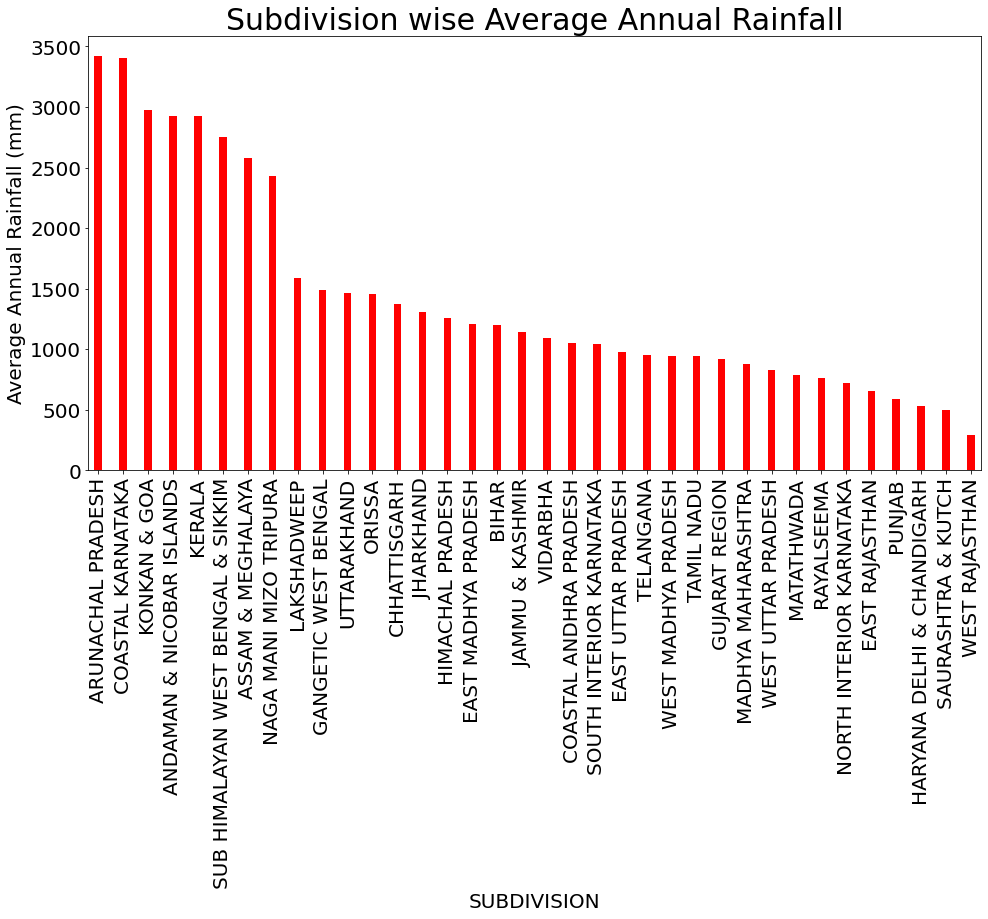

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])


## Discussion ##
 - Subdivisions with highest annual rainfall are "Arunachal Pradesh", "Coastal Karnataka" and "Konkan & Goa" with approximate annual rainfall of 3418mm, 3408mm and 2977mm respectively.
 - Subdivisions with lowest annual rainfall are "West Rajasthan", "Saurashtra & Kutch" and "Haryana Delhi & Chandigarh" with approximate annual rainfall of 292mm, 495mm and 530mm respectively.



Total Rainfall in Each Year

Max: 61815.600000000006 ocurred in [1961]
Max: 41273.6 ocurred in [1972]
Mean: 50182.83826086957


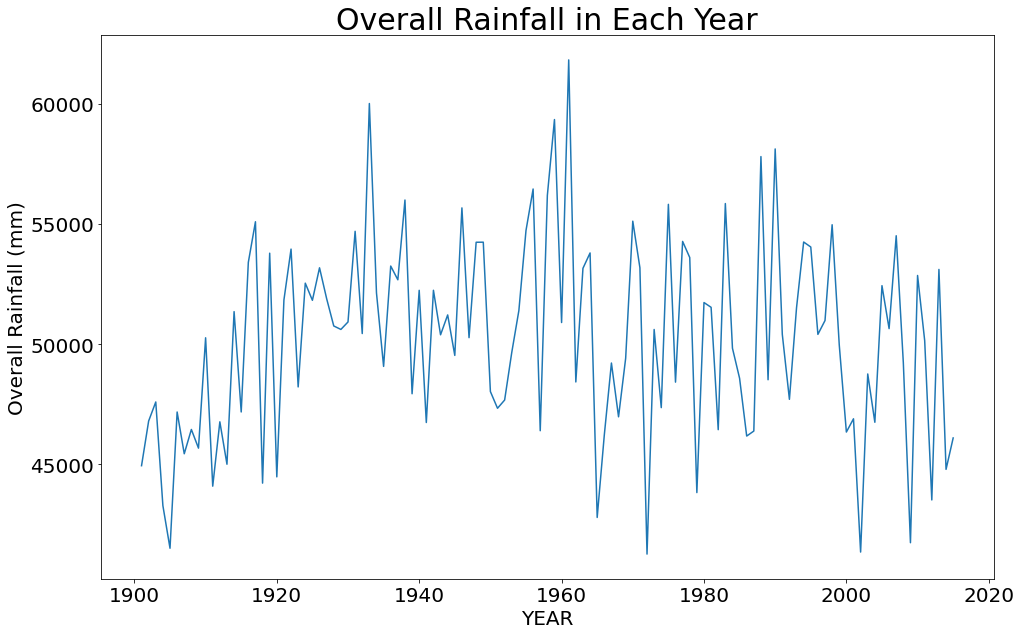

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['ANNUAL']
dfg.plot(kind='line', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))



## Discussion ##

 - Maximum overall rainfall (sum of all 36 subdivision) of 61815mm occurred in the year 1961

 - Minimum overall rainfall (sum of all 36 subdivision) of 41273mm occurred in the year 1972

 - Average (of all 36 subdivs) overall rainfall (sum of all 36 subdivision) is 50182mm

## Monthly Rainfalls Plot (Subdivision wise) ##

Max: 348.56750468137267 ocurred in ['JUL']
Max: 19.11137059083043 ocurred in ['JAN']
Mean: 118.95843815772808


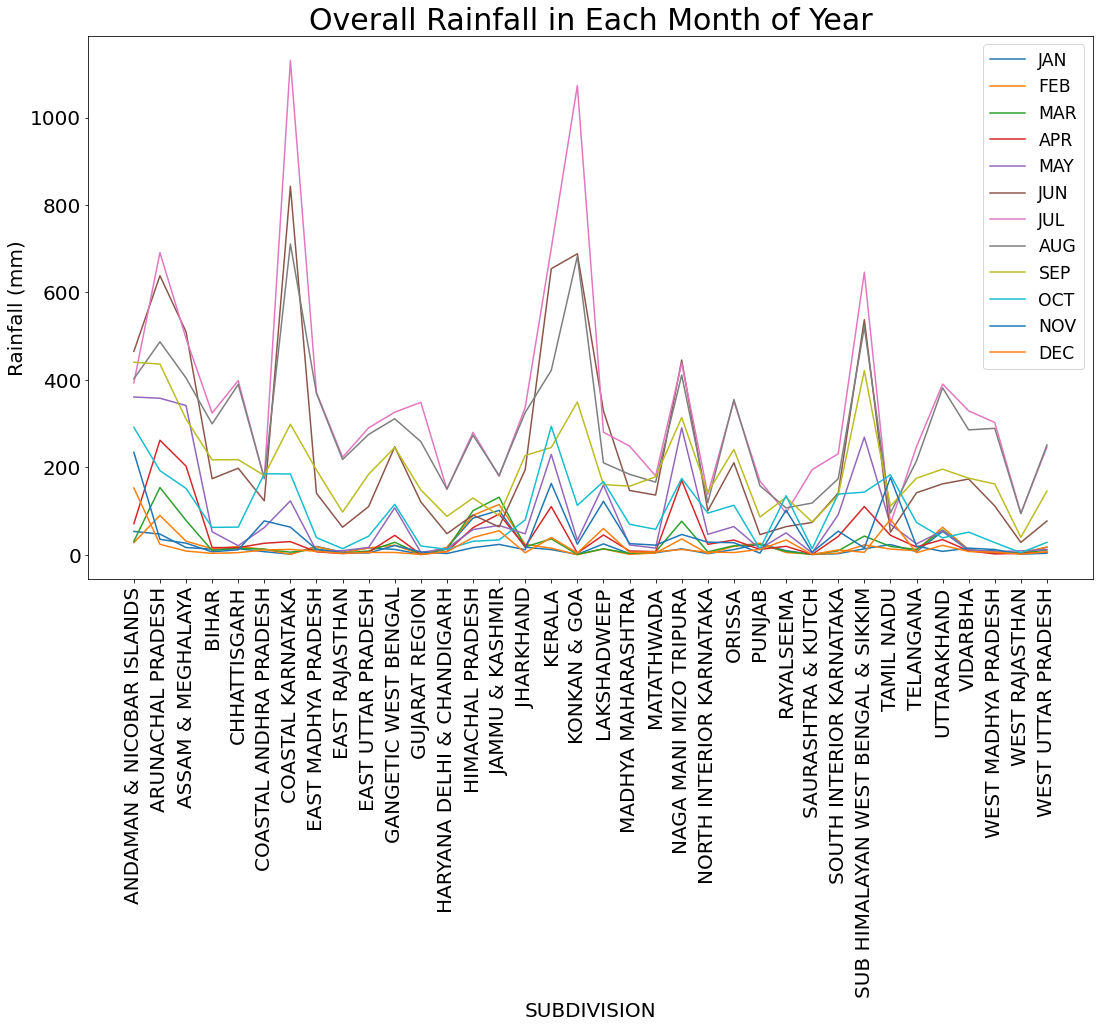

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dfg = df.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))




## Discussion ##

 - Highest average rainfall of 348mm occurred in the month of July
 - Lowest average rainfall of 19mm occurred in the month of January


## Monthly Rainfalls Plot (Yearwise) ##

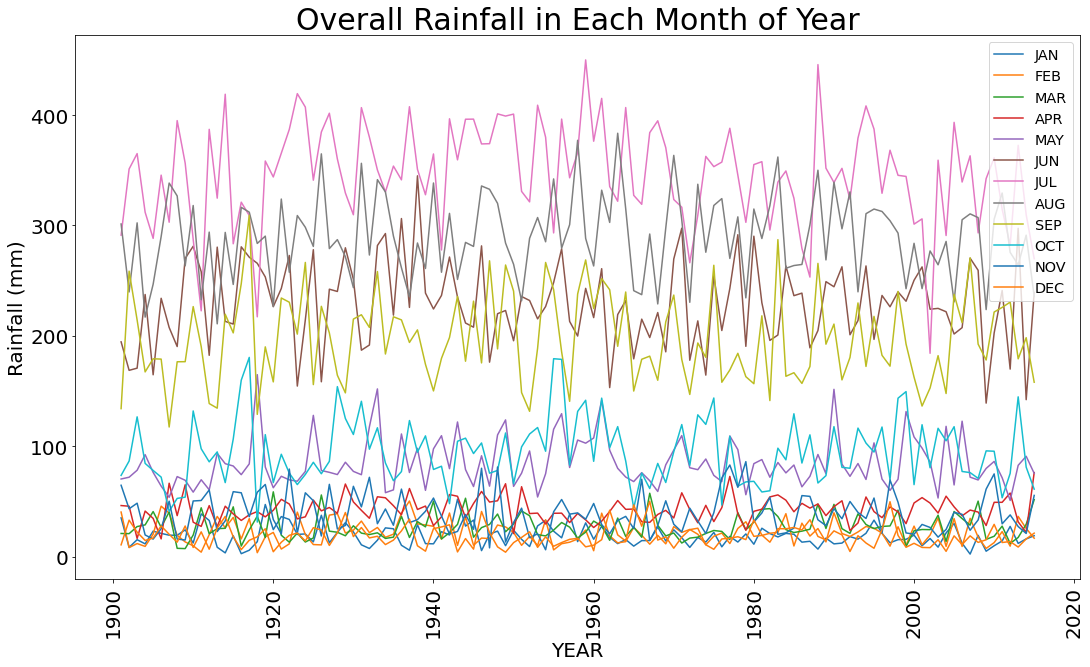

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

## Prediction using Linear Regression ##

**Single Linear Model on Whole Data Ignoring Subdivision**

To begin with, we shall predict the rainfall for the current month with predictor variables as the rainfall in previous three months. Data is arranged into 36810 rows and 4 columns with first three columns as the predictor variables and the last column is dependent variable. For each month from April to December, four columns are appended at the bottom of the data to create a data of 36810 rows and 4 columns. Training/Testing is split in the ratio 80:20 randomly.

MAD (Training Data): 93.84998413556205
MAD (Test Data): 92.76205525561716


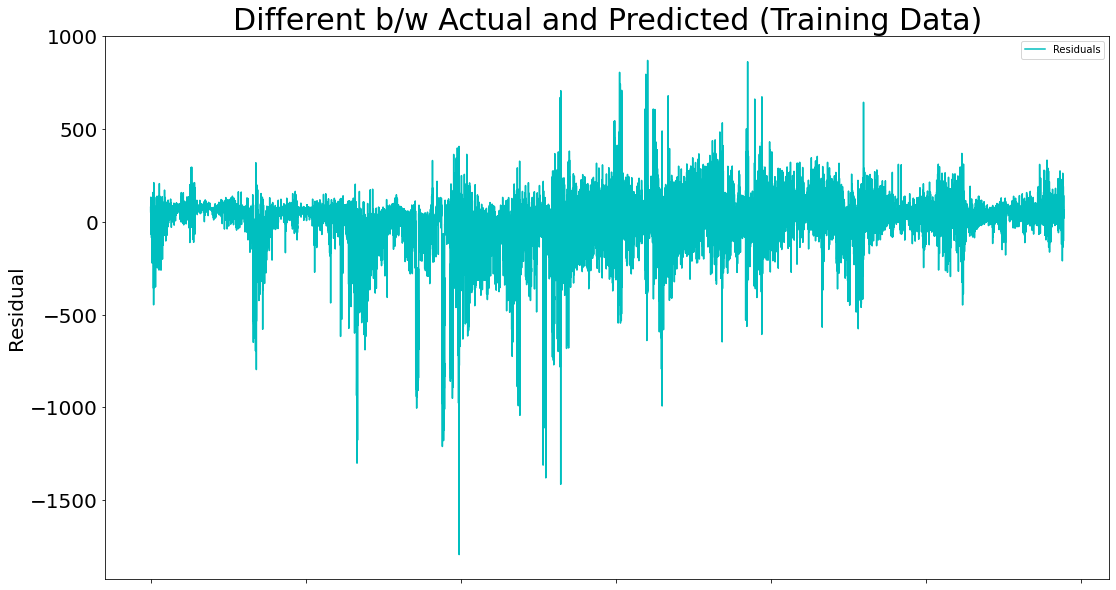

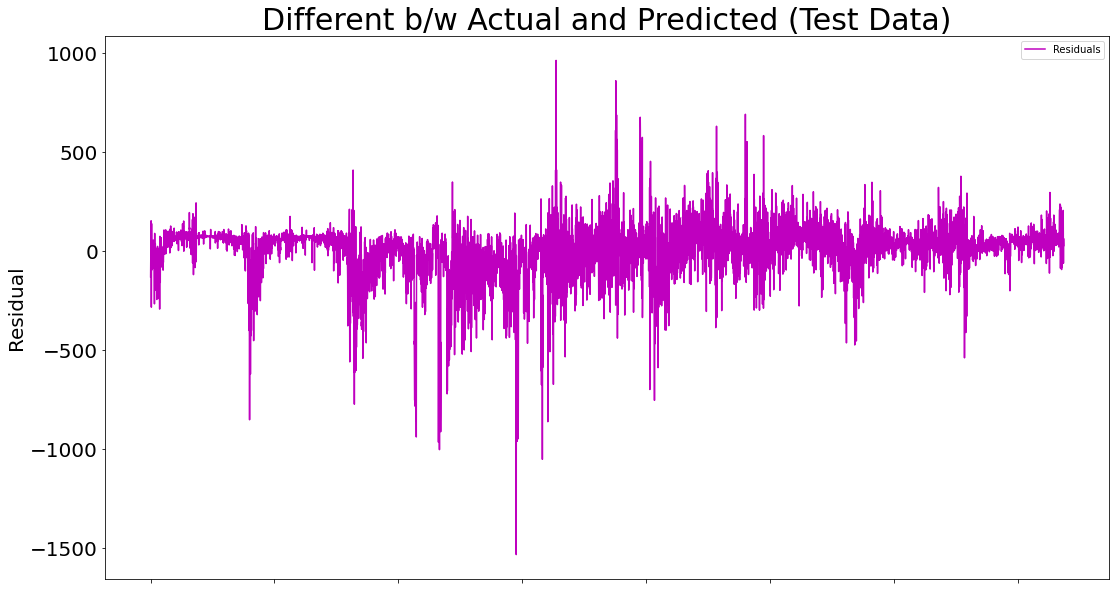

In [ ]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

**Single Linear Model on Whole Data Including Subdivision**

In this section, we shall predict the rainfall for the current month with predictor variables as the rainfall in previous three months and the subdivision. As subdivision is a categorical variable consisting of 36 values, 36 dummy binary variables are added inplace of categorical variable to use in the regression.  Data is arranged into 36810 rows and 40 columns with 39 columns as the predictor variables and the one column is dependent variable. Out of 39 variables, three are the rainfalls for previous three months and 36 are the binary variables to be used for subdivisions. For each month from April to December,  columns are appended at the bottom of the data to create a data of 36810 rows and 4 columns. Training/Testing is split in the ratio 80:20 randomly.

MAD (Training Data): 88.36794371313097
MAD (Test Data): 87.63433522175023


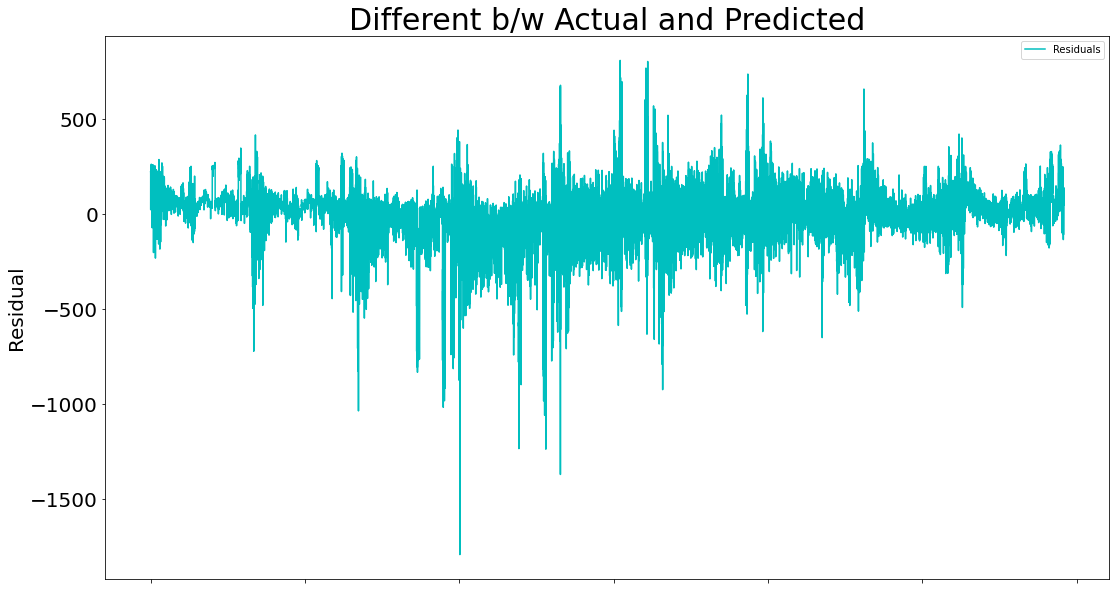

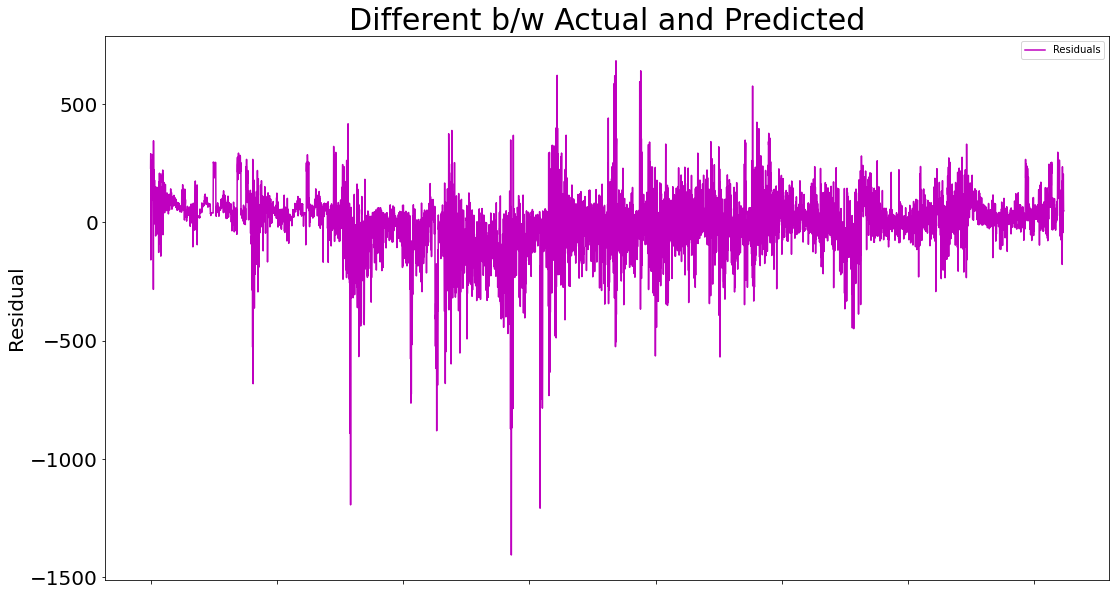

In [ ]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]

df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)


df2.drop('SUBDIVISION', axis=1,inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])


reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
#print(reg.coef_)
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)



predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

**Linear Model Fitted to Each Subdivision Category Independently**

There will 36 different linear models for each category corresponding to each subdivision. First Data is extracted for each subdivision. For each months from April to December, data is appended to end of the data from. There will be four columns (one dependent variable and three independent variables). And for each subdivision the total number rows in the data come out to be 115*9 (approximately. 9 months (april to dec) appended at the bottom). Training/Testing is split in the ratio 80:20 randomly.

Overall MAD (Training): 86.26875234784103
Overall MAD (Testing): 86.64648262046975


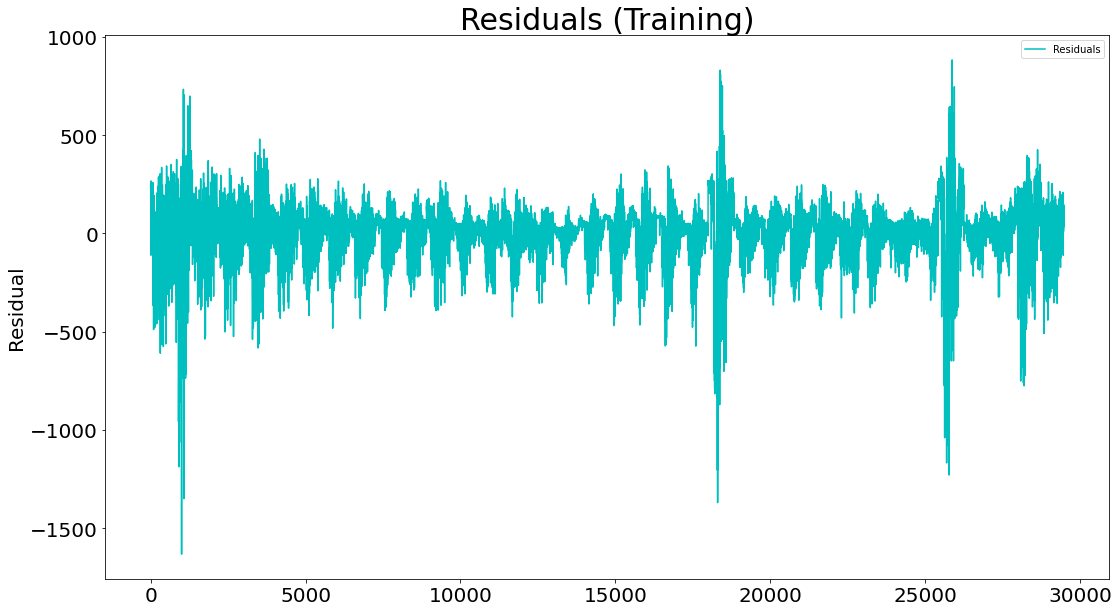

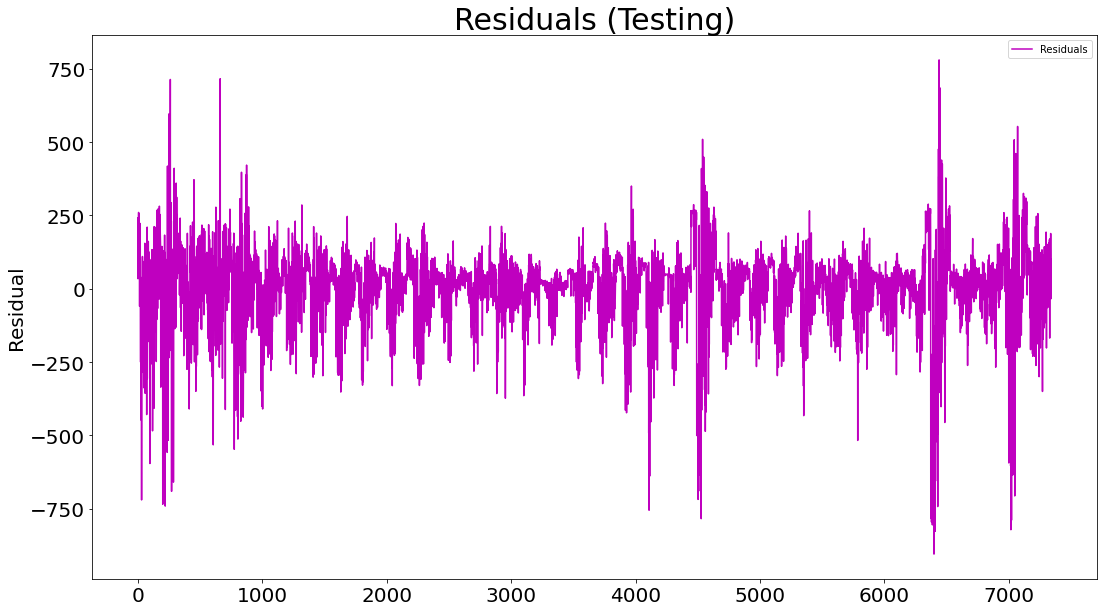

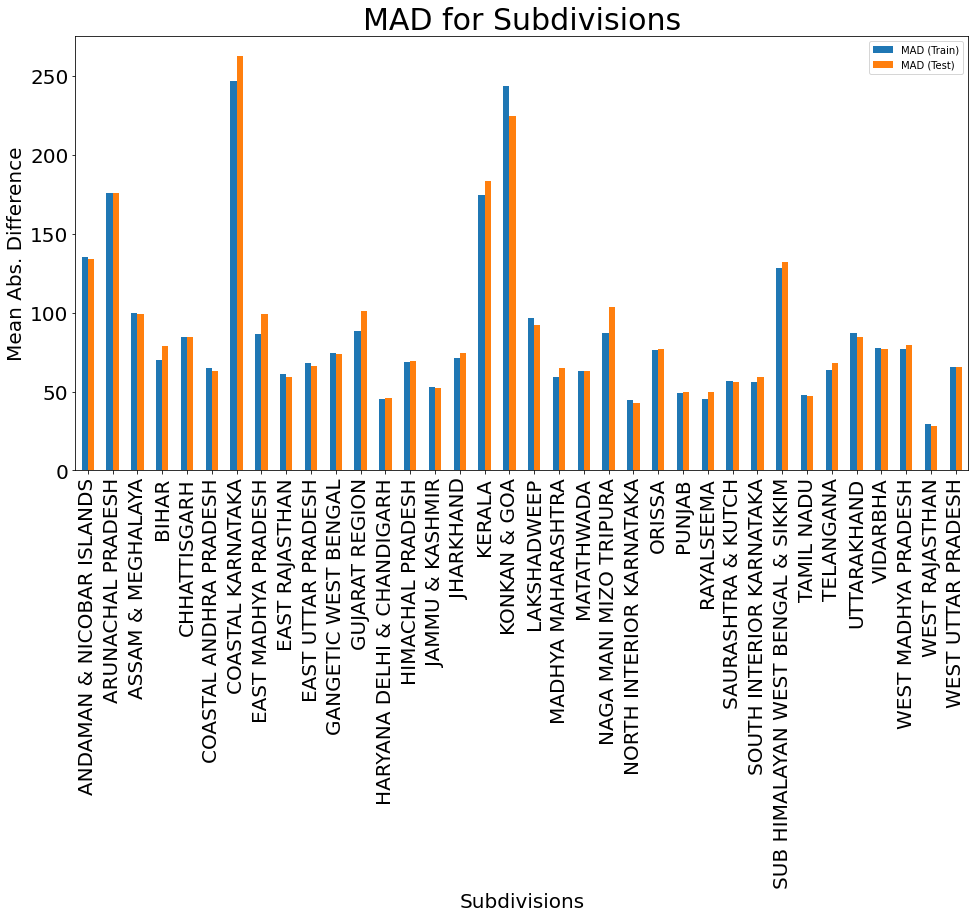

In [ ]:

#subdivs = df['SUBDIVISION'].unique()
#num_of_subdivs = subdivs.size

df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = df[df['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3]]]
    df2.columns = np.array(['x1','x2','x3','x4'])
    for k in range(1,9):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3]]]
        df3.columns = np.array(['x1','x2','x3','x4'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.8
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
    
    predicted_values = reg.predict(df_train.drop('x4',axis=1))
    residuals = predicted_values-df_train['x4'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
    
    predicted_values = reg.predict(df_test.drop('x4',axis=1))
    residuals = predicted_values-df_test['x4'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall MAD (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["MAD (Train)"])
pd_mad["MAD (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.5,title='MAD for Subdivisions', ax= ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
